<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_ml_w15_qlearnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Q-Learning

Today we explore using $Q$-learning to extract optimal policies in reinforcement learning problems.

In [13]:
pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from random import random

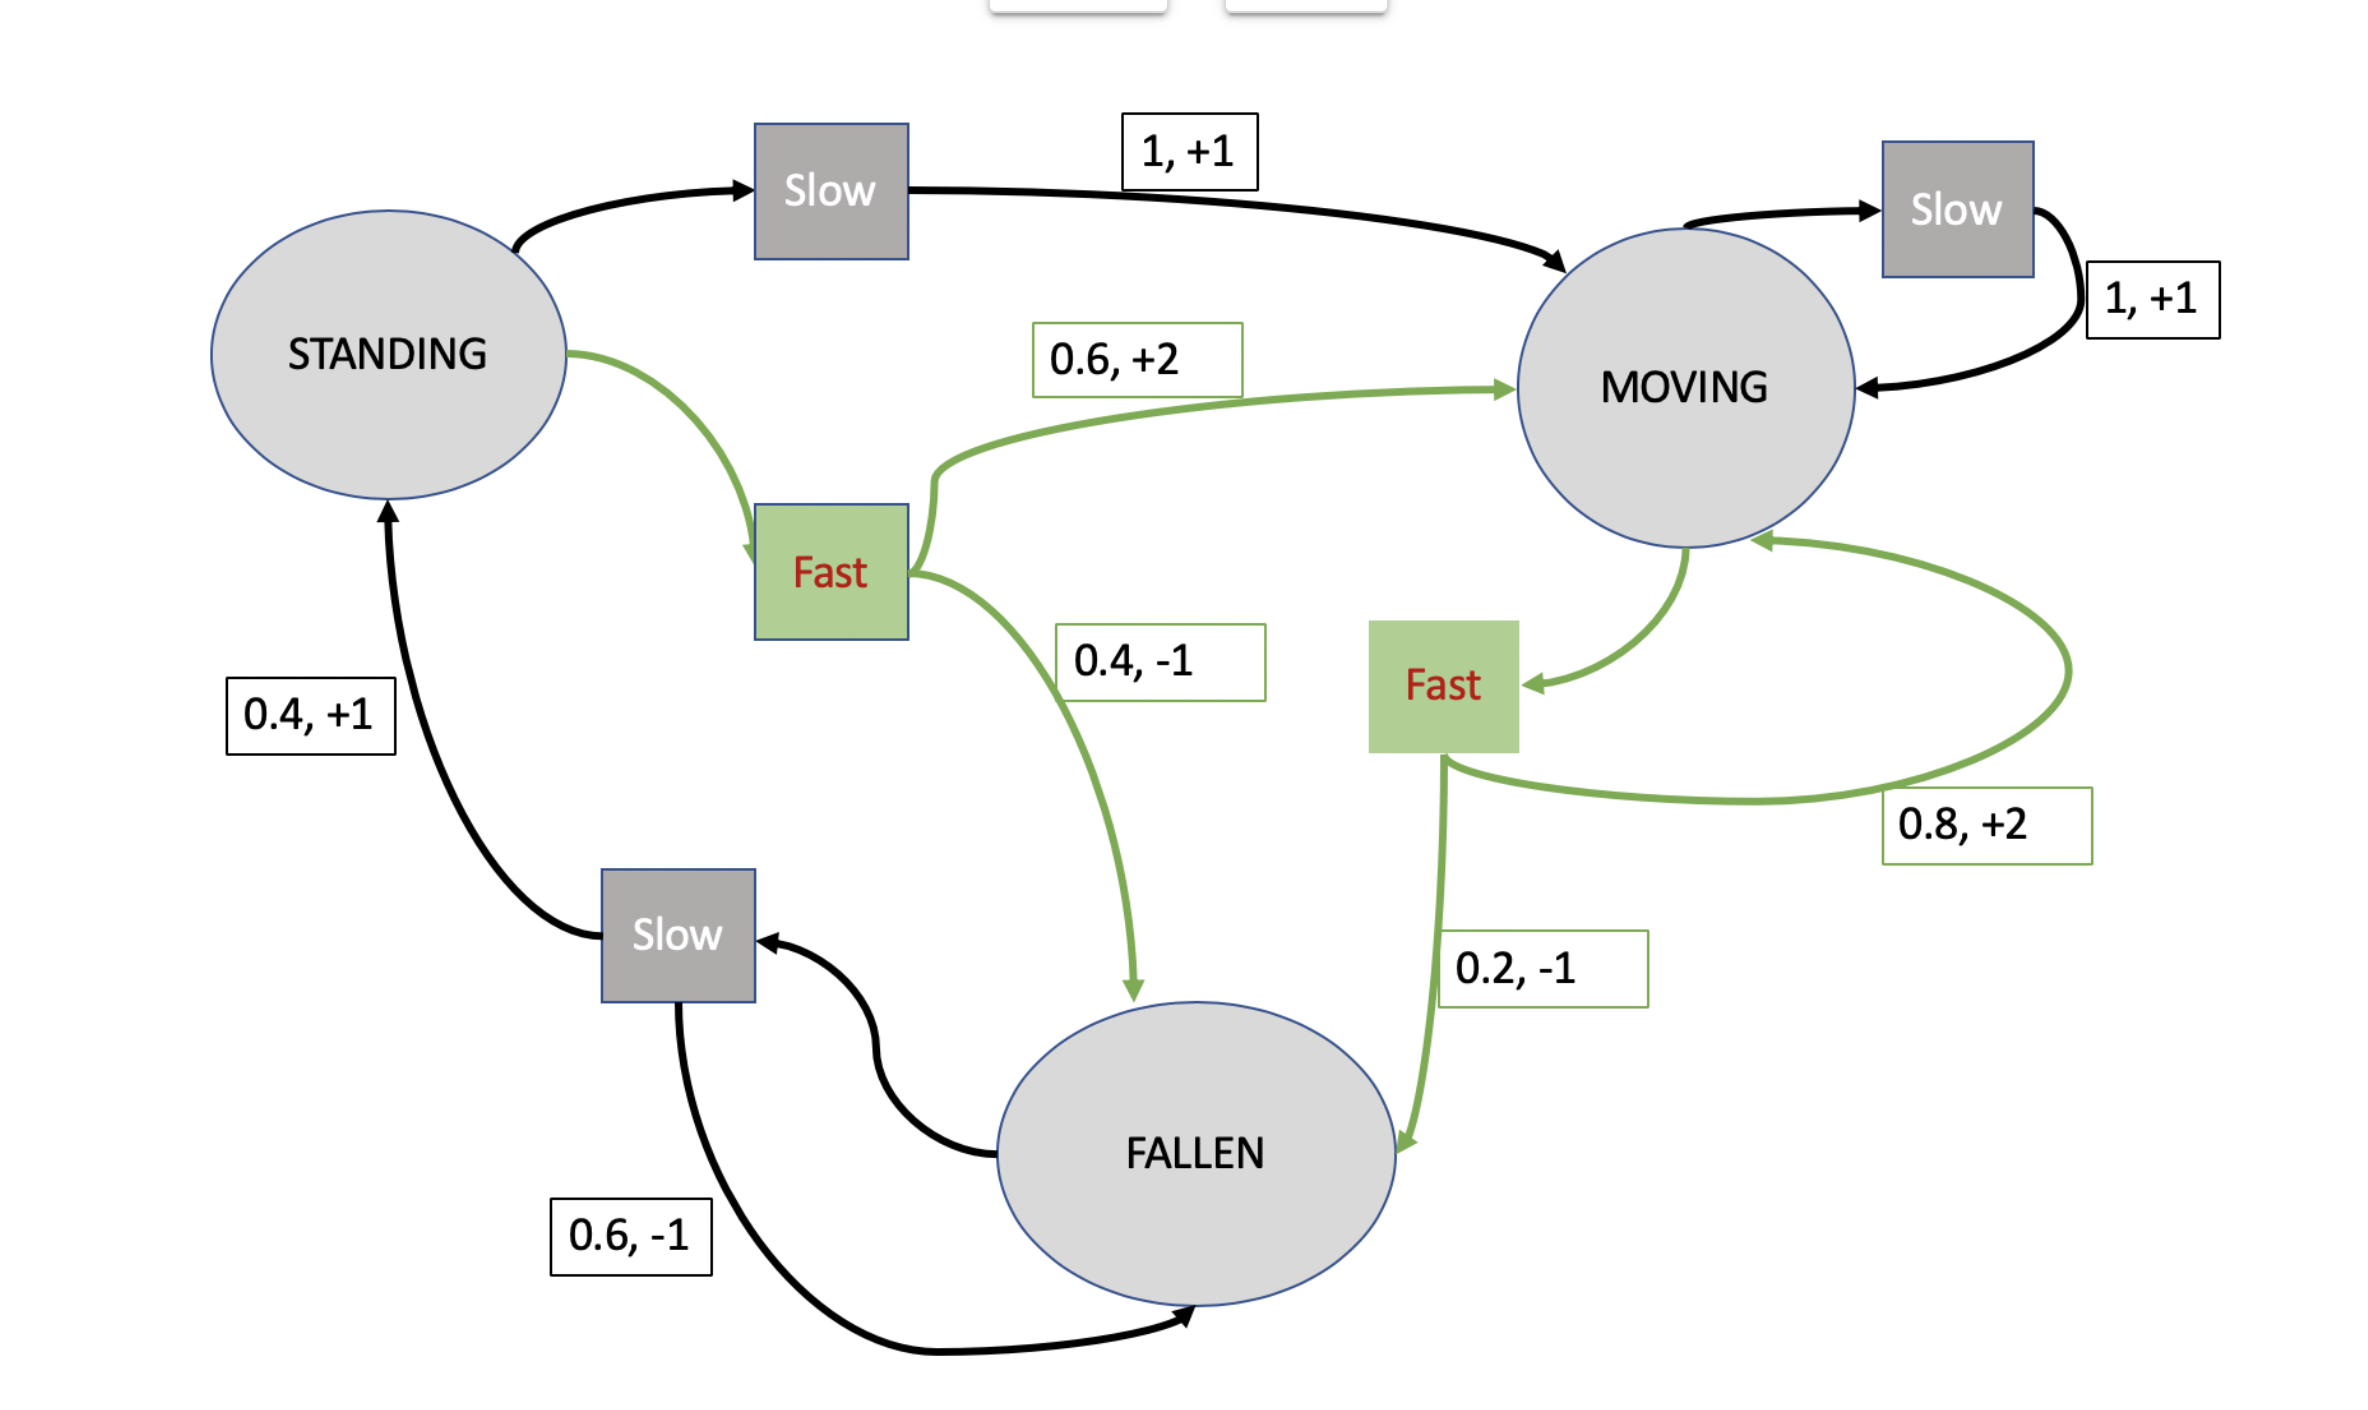

### Q-Value Iteration

We saw in the lectures the idea of value-iteration and the similar approach using the *Q-Value Iteration Algorithm*.  Here, we keep track of how well our policy performs through the following formula:

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$

We will use our matrices above to represent $P$ and $R$ and our possible actions to draw from.  The matrix $Q$ will be a $S \times A$ array initialized with 0 and $-\infty$ for possible and impossible actions respectively.  We track the $Q$-values associated with each state,action pair.  Below, we implement the *Q-Value Iteration* algorithm by first initializing our $Q$ array and subsequently implementing the algorithm to update $Q(s, a)$. 

As stated above, our $Q$ table contains values related to each possible state, action pair.  We want this matrix to contain $-\infty$ where there are impossible actions, and the orientation is demonstrated below where rows are states and columns are actions:

$$Q-table: \begin{bmatrix}
(standing, slow) & (standing, fast) \\
(fallen, slow) & (fallen, fast) \\
(moving, slow) & (moving, fast \\
\end{bmatrix}$$

In [15]:
## Instantiate a Q-table to represent our problem.  
## Use an initial value of zero for any possibility
## and -np.inf for any impossible actions.
Q = np.zeros((3,2))
Q[1,1] = -np.inf

In [16]:
Q

array([[  0.,   0.],
       [  0., -inf],
       [  0.,   0.]])

Now we are ready to implement the algorithm repeated below.  To do so, we write a function that expects the key elements of the problem in addition to a **discount rate** and number of iterations.

$$Q_{k + 1}(s, a) \leftarrow \sum_{s'} P(s, a, s')[ R(s, a, s') + \gamma \max_{a'} Q_k(s', a')] \quad \forall (s, a)$$

In [17]:
def q_value_iteration(Q, P, R, possible_actions, discount_rate, n_iter):
  
  for i in range(n_iter):
    Q_prev = Q.copy()
    for s in range(3):
      for a in possible_actions[s]:
        Q[s, a] = sum([P[s,a,sp]*(R[s,a,sp] + discount_rate*np.max(Q_prev[sp])) for sp in range(3)])
  return Q

In [18]:
def q_value_iteration(Q, P, R, possible_actions, discount_rate, n_iter):
    '''
    This function implements a Q-value iteration and returns
    an updated Q-table.
    
    Parameters
    ----------
    Q: Q-value table initialized with zero values for possible
    actions and -np.inf for impossible actions
    
    P: Probability transition matrix
    
    R: Reward matrix
    
    possible_actions: List of possible actions 
    
    discount_rate: gamma in q-value iteration formula representing 
    discounting of past episodes
    
    n: number of iterations to run iterations
    
    Returns
    -------
    Q: Updated Q-table after n-iterations
    
    Examples
    --------
    q_value_iteration(Q, P, R, possible_actions, 0.9, 1) ---> 
    array([[ 1. ,  0.8],
       [-0.2,  nan],
       [ 1. ,  1.4]])
       
       
    q_value_iteration(Q, P, R, possible_actions, 0.1, 1000) --->
    '''
    pass

In [19]:
P_ = np.array([[[0, 0, 1], [0, .4, .6]],
             [[0.4, 0.6, 0], [np.nan, np.nan, np.nan]],
             [[0, 0, 1], [0, 0.2, 0.8]]])
R_ = np.array([[[0, 0, 1], [0, -1, 2]], [[1, -1, 0], [np.nan, np.nan, np.nan]], [[0, 0, 1], [0, -1, 2]]])
possible_actions_ = [[0, 1], [0], [0, 1]]
Q_ = np.full((3, 2), -np.inf)
for state, actions in enumerate(possible_actions_):
    Q_[state, actions] = 0

In [20]:
q_value_iteration(Q_, P_, R_, possible_actions_, 0.9, 5000)

Now that we have our Q-table, we can extract the optimal policy by examining each states rows and selecting the action with maximum Q-value.

In [21]:
def extract_policy(q_table):
  return np.argmax(Q, axis=1)

In [22]:
def extract_policy(q_table):
    '''
    This function takes in a q-value table
    and extracts the optimal action for each state.
    
    Parameters
    -----------
    q_table: State x Action matrix of q-values
    
    Returns
    -------
    policy: one-dimensional policy with optimal action for each 
    state
    
    Examples:
    ---------
    table_1 = q_value_iteration(Q, P, R, possible_actions, 0.9, 5000)
    table_2 = q_value_iteration(Q, P, R, possible_actions, 0.001, 5000)
    print(extract_policy(table_1)) ===> array([0, 0, 0])
    print(extract_policy(table_2)) ===> array([0, 0, 1])
    '''
    pass

In [23]:
# pip install gymnasium

#### Taxi

- [Docs](https://gymnasium.farama.org/environments/toy_text/taxi/)

In [24]:
env = gym.make('Taxi-v3', render_mode = "rgb_array")
env.reset()

(367, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

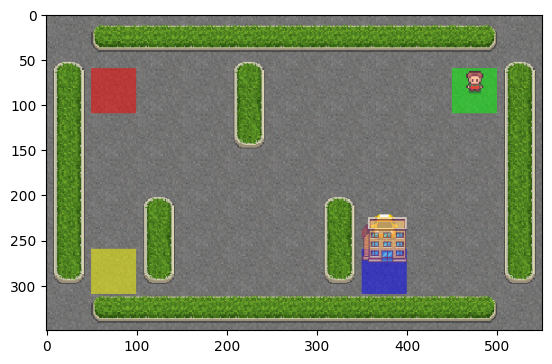

In [25]:
plt.imshow(env.render())

In [26]:
env.action_space.n

6

In [27]:
env.observation_space.n

500

Iterations to display random actions.

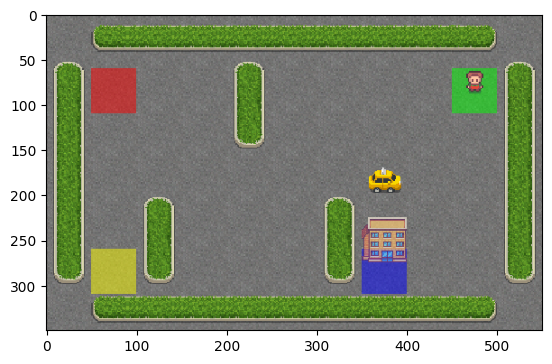

In [28]:
from IPython import display
from time import sleep
    
for i in range(100):
  action = env.action_space.sample()
  new_state, reward, done, truncated, info = env.step(action)
  display.clear_output(wait = True)
  plt.imshow(env.render())
  plt.show()
  sleep(0.5)
  plt.close();

In [29]:
s = env.reset()
s

(203, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})



Recall the Bellman update for Q-learning:

$$Q(s,a) = (1-\alpha)Q(s,a) + \alpha(r + \gamma \max_{a'}Q(s', a'))$$

You will write the function `QLearn`, which takes parameters `epsilon`, `alpha`, `gamma`, and `n_steps` and runs $\epsilon$-greedy Q-learning on the Taxi `env`, returning the optimal found policy.
- `epsilon` is a value from 0 to 1 which represents the exploration-exploitation tradeoff. When deciding what action to take, you should take a random action with `epsilon` probability, and take the best current action with `1-epsilon` probability.
- `alpha` is the learning rate, as used in the Bellman update.
- `gamma` is the discount factor, as used in the Bellman update.
- `n_steps` is the number of episodes to run. This should be the number of calls you make to `env.step`.

In [30]:
def QLearn(epsilon, alpha, gamma, n_steps):

    # Initialize the Q[s,a] values
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Reset the environment
    s, _ = env.reset()

    # For n_steps iterations...
    for _ in range(n_steps):

        # Get the next action to take using an epsilon-greedy policy
        s = s if type(s) == int else s[0]
        if epsilon < random():
          # optimal policy
          a = np.argmax(Q[s])
        else:
          # random move
          a = env.action_space.sample()

        # Update the value of Q[s,a] using the Bellman update
        # print(s, a)
        # break
        new_state, reward, done, early, info = env.step(a)

        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(reward + gamma * np.max(Q[new_state]))
        

        # Update the current state, depending on if it is done or not
        s = env.reset() if done else new_state

    # Extract the optimal policy for each state from Q
    P = np.array([np.argmax(Q[s]) for s in range(env.observation_space.n)])

    return P

In [31]:
env = gym.make('Taxi-v3', render_mode = "rgb_array")
P = QLearn(.5, .9, .999, 50000)

def run(P, show=False, max_steps=100):
    s = env.reset()
    n = 0
    total_r = 0
    while n < max_steps:
        s = s if type(s) == int else s[0]
        n += 1
        if show:
            display.clear_output(wait=True)
            plt.imshow(env.render())
            plt.show()
            sleep(.2)
            plt.close();
        s, r, done, _, _ = env.step(P[s])
        total_r += r
        if done: break
    return total_r / n

In [32]:
P = QLearn(.5, .9, .999, 50000)

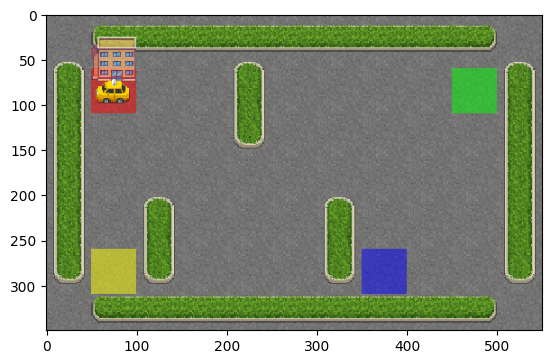

Average reward: 0.9090909090909091


In [33]:
print(f'Average reward: {run(P, show=True)}')

#### Exploring another environment

The approach above should be generalizable to other enviornments in the `gymnasium`.  Explore the additional example of [Cliff Walking](https://gymnasium.farama.org/environments/toy_text/cliff_walking/) and see if you can extract a successful policy using $Q$-learning.  

In [34]:
env = gym.make('CliffWalking-v0', render_mode = "rgb_array")
P = QLearn(.7, .9, .999, 50000)

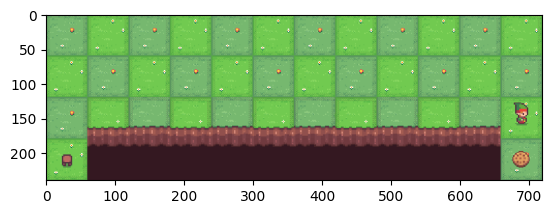

Average reward: -1.0


In [35]:
print(f'Average reward: {run(P, show=True)}')

In [9]:
env = gym.make('FrozenLake-v1', render_mode = "rgb_array")
P = QLearn(.5, .9, .999, 50000)
print(f'Average reward: {run(P, show=True)}')

NameError: ignored

In [8]:
env.observation_space

Box(0, 255, (96, 96, 3), uint8)